### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm
import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Data Understanding/Data Cleaning

In [4]:
boombikes = pd.read_csv("day.csv")
print(boombikes.shape)
boombikes.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [6]:
# we can remove instant(mostly it is a sl:no), casual,registered as the data in these attributes is captured by other
# attributes in the data set.
boombikes = boombikes.drop(columns=["instant","casual","registered"])
print(boombikes.shape)
boombikes.head()

(730, 13)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


- ##### Here "atemp" which is a "feel-like temperature" is more correlated to "hum", "windspeed" than "temp" and can also observe that "temp" and "atemp" are highly correlated as expected and can drop of them.
- ##### Can drop "atemp"

In [7]:
boombikes[["temp","atemp","hum","windspeed"]].corr()

,temp,atemp,hum,windspeed
temp,1.000000,0.991696,0.128565,-0.158186
atemp,0.991696,1.000000,0.141512,-0.183876
hum,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.158186,-0.183876,-0.248506,1.000000


In [8]:
boombikes = boombikes.drop(columns="atemp")
print(boombikes.shape)
boombikes.head()

(730, 12)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


- ##### From the data dictionary below we can see that most of the categorical variables have been adressed with numbers and can convert them back for ease of understanding 

Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [9]:
# Verifying the categories of categorical variable
print("Uniques values in season =", boombikes.season.unique().tolist())
print("Uniques values in year =", boombikes.yr.unique().tolist())
print("Uniques values in month =", boombikes.mnth.unique().tolist())
print("Uniques values in holiday =", boombikes.holiday.unique().tolist())
print("Uniques values in weekday =", boombikes.weekday.unique().tolist())
print("Uniques values in workingday =", boombikes.workingday.unique().tolist())
print("Uniques values in weathersit =", boombikes.weathersit.unique().tolist())

Uniques values in season = [1, 2, 3, 4]
Uniques values in year = [0, 1]
Uniques values in month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Uniques values in holiday = [0, 1]
Uniques values in weekday = [6, 0, 1, 2, 3, 4, 5]
Uniques values in workingday = [0, 1]
Uniques values in weathersit = [2, 1, 3]


In [10]:
# mapping the categorical variables
boombikes["season"] = boombikes["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
boombikes["mnth"] = boombikes["mnth"].map({1:"jan", 2:"feb", 3:"mar", 4:"april",5:"may",6:"june",7:"july",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"})
boombikes

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01-01-2018,spring,0,jan,0,6,0,2,14.110847,80.5833,10.749882,985
1,02-01-2018,spring,0,jan,0,0,0,2,14.902598,69.6087,16.652113,801
2,03-01-2018,spring,0,jan,0,1,1,1,8.050924,43.7273,16.636703,1349
3,04-01-2018,spring,0,jan,0,2,1,1,8.200000,59.0435,10.739832,1562
4,05-01-2018,spring,0,jan,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,spring,1,dec,0,4,1,2,10.420847,65.2917,23.458911,2114
726,28-12-2019,spring,1,dec,0,5,1,2,10.386653,59.0000,10.416557,3095
727,29-12-2019,spring,1,dec,0,6,0,2,10.386653,75.2917,8.333661,1341
728,30-12-2019,spring,1,dec,0,0,0,1,10.489153,48.3333,23.500518,1796


##### For weekday column we can use "dteday" attribute to know the sequence of numbering to each day.
- From "dteday" we can see that "02-01-2018" is marked as "0" which happens to be "Tuesday", but at the same time "30-12-2019" is also marked as "0" which happens to be "Monday"
- By this we can say that there is an error in numbering the days and need to extract days from "dteday"column for accuracy.

In [11]:
# converting the dteday column to datetime datatype to extract "days"
boombikes.dteday = pd.to_datetime(boombikes.dteday,format="%d-%m-%Y")
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 62.8+ KB


In [12]:
# Replacing numbers in weeday columns to days
# After modifying the "weekday" column we can drop "dteday" column
boombikes.weekday = boombikes.dteday.dt.strftime("%a")
boombikes.weekday = boombikes.weekday.apply(lambda x : x.lower())
boombikes = boombikes.drop(columns="dteday")
boombikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,2,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,2,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,fri,1,2,10.420847,65.2917,23.458911,2114
726,spring,1,dec,0,sat,1,2,10.386653,59.0000,10.416557,3095
727,spring,1,dec,0,sun,0,2,10.386653,75.2917,8.333661,1341
728,spring,1,dec,0,mon,0,1,10.489153,48.3333,23.500518,1796


- ##### In weathersit column we can observe that more than one word is used for explaining the weather situation.
    - ##### weathersit : 
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- ##### So here we can consider one word from the given set of words to represent the weather situation.
    - ##### We can consider the following for our mapping
        - 1: Clear
        - 2: Cloudy
        - 3: Light Rain
        - 4: Heavy Rain

In [13]:
# We only have three weather situations in our data
boombikes.weathersit.unique().tolist()

[2, 1, 3]

In [14]:
boombikes.weathersit = boombikes.weathersit.map({1: "clear",2: "cloudy",3: "light rain"})

In [15]:
print(boombikes.shape)
boombikes.head()

(730, 11)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


### Data Visualization

- Here we can understand which variables have good correlation with the target variable
- Can also analyse the varibles with multicolinearity

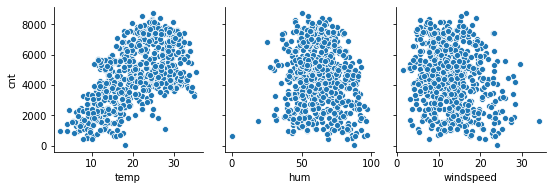

In [16]:
# Data visualization of continuous variables with target variable.
sns.pairplot(boombikes,x_vars=["temp","hum","windspeed"],y_vars="cnt")
plt.show()

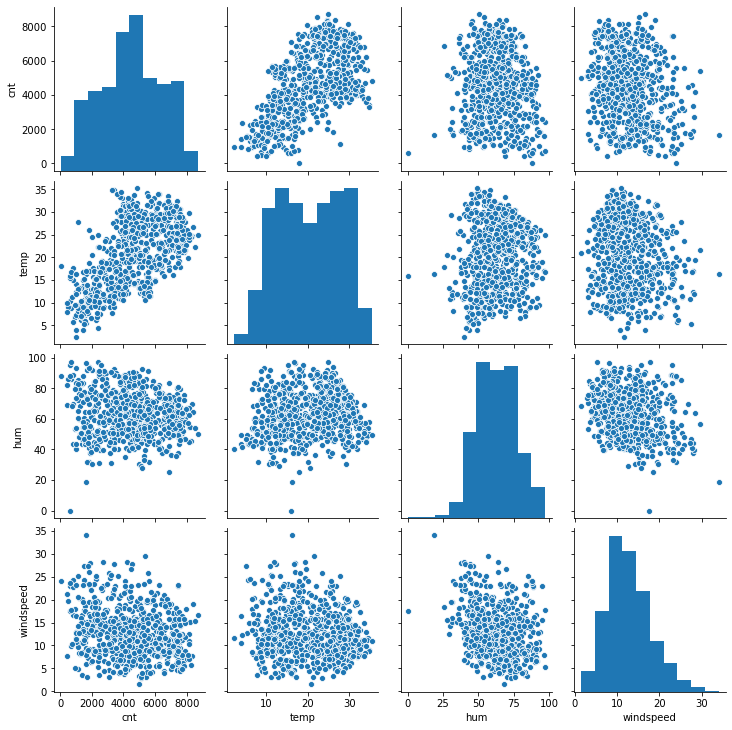

In [17]:
sns.pairplot(boombikes[["cnt","temp","hum","windspeed"]])
plt.show()

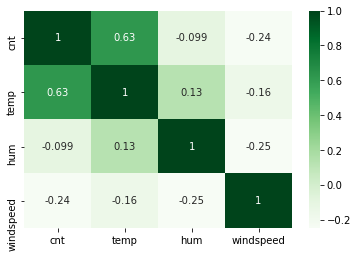

In [18]:
# In continues variables we can see that temp has good correlation with target variable("cnt")
sns.heatmap(boombikes[["cnt","temp","hum","windspeed"]].corr(),annot=True,cmap="Greens")
plt.show()

- ##### lets visualize the data for categorical variables.

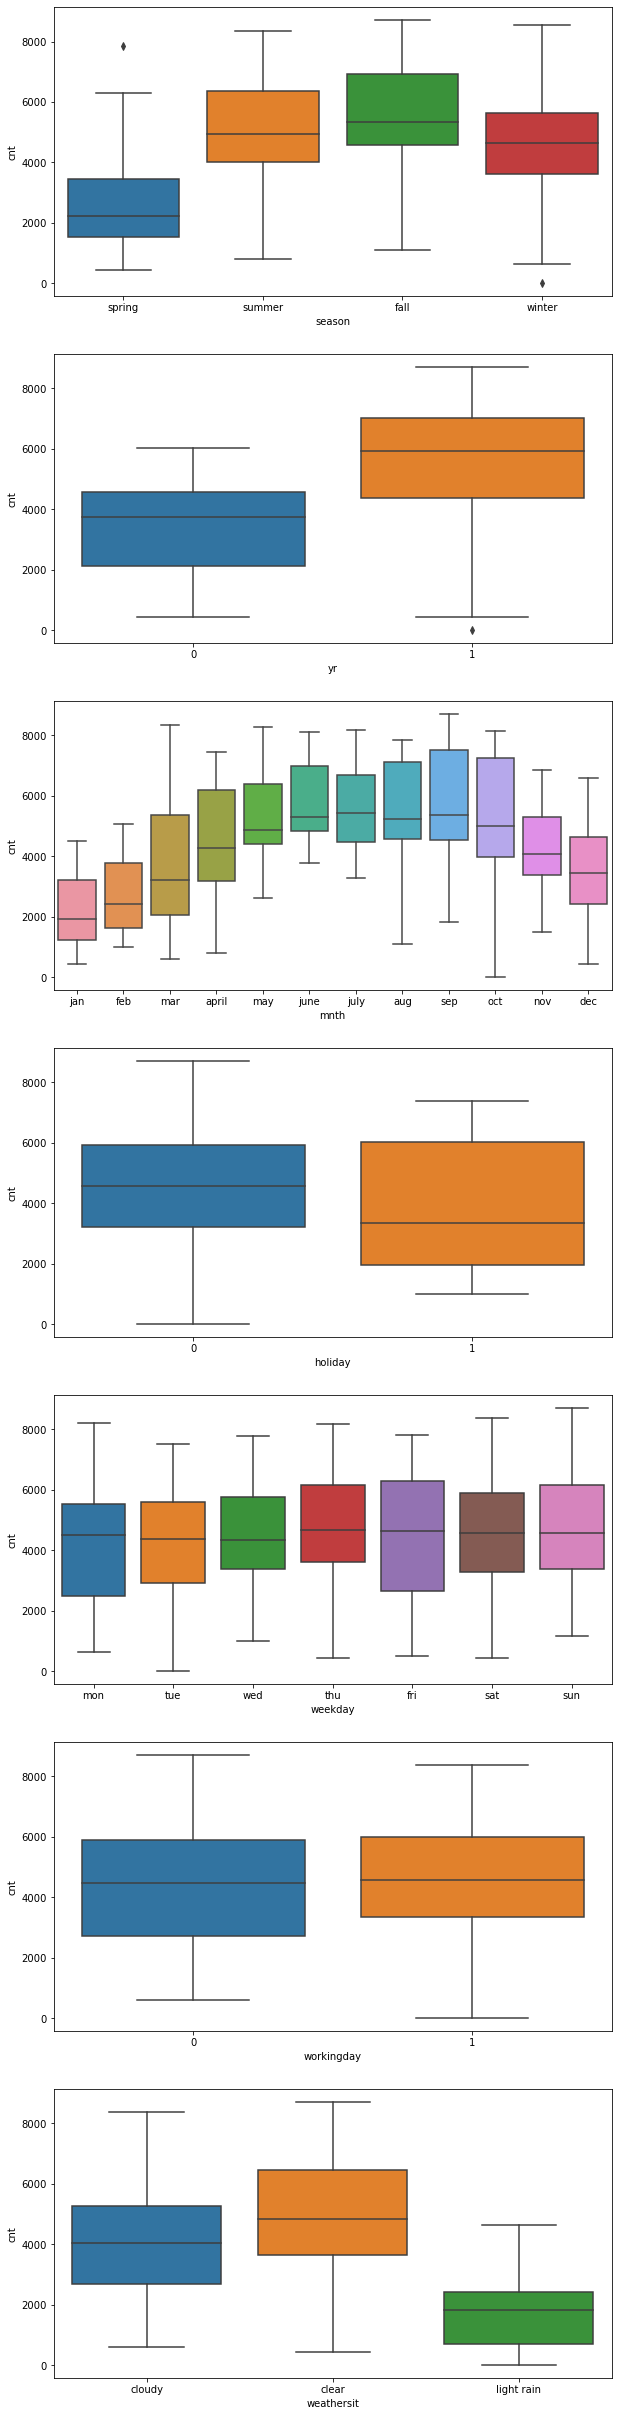

In [19]:
plt.figure(figsize=(10,50))
plt.subplot(8,1,1)
sns.boxplot(data = boombikes, x="season", y="cnt")
plt.subplot(8,1,2)
sns.boxplot(data = boombikes, x="yr", y="cnt")
plt.subplot(8,1,3)
sns.boxplot(data = boombikes, x="mnth", y="cnt")
plt.subplot(8,1,4)
sns.boxplot(data = boombikes, x="holiday", y="cnt")
plt.subplot(8,1,5)
sns.boxplot(data = boombikes, x="weekday", y="cnt")
plt.subplot(8,1,6)
sns.boxplot(data = boombikes, x="workingday", y="cnt")
plt.subplot(8,1,7)
sns.boxplot(data = boombikes, x="weathersit", y="cnt")
plt.show()

- ##### lets do bivariate analysis.

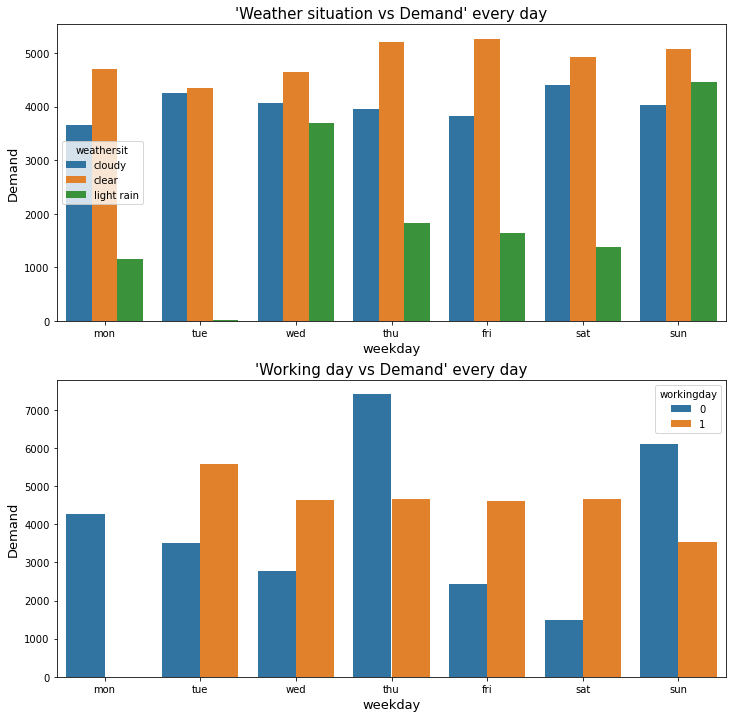

In [20]:
# surprisingly on "wed" & "sun" for weathersit="light rain" has no effect on demand when compared to remaining days.
# surprisingly "wed" & "sun", has more demand compared to remaining days when it is not a working day.
# we can also observe that "mon"("mon"&"tue" for 2018) is a weekend according to the data provided.

plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
plt.title("'Weather situation vs Demand' every day",size = 15)
sns.barplot(boombikes.weekday,boombikes.cnt,hue=boombikes.weathersit,ci=False)
plt.xlabel("weekday",size=13)
plt.ylabel("Demand",size=13)

plt.subplot(2,1,2)
plt.title("'Working day vs Demand' every day",size = 15)
sns.barplot(boombikes.weekday,boombikes.cnt,hue=boombikes.workingday,ci=False)
plt.xlabel("weekday",size=13)
plt.ylabel("Demand",size=13)

plt.show()

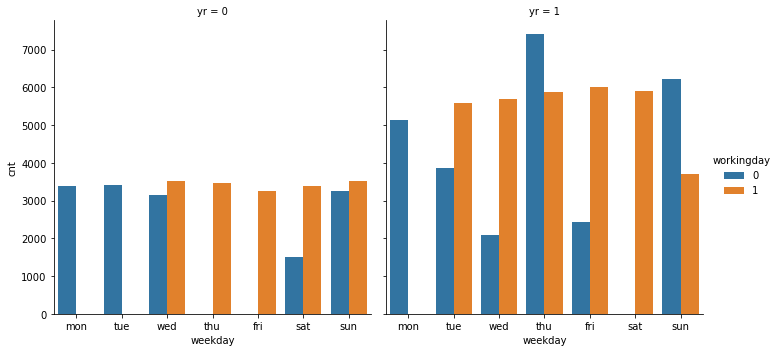

In [21]:
sns.catplot(data=boombikes,y="cnt",x="weekday",hue="workingday",col="yr",kind="bar",ci=False)
plt.show()

### Data Preparation

- ##### Creating Dummy Variables for the categorical variables with more than 2 levels

In [22]:
print(boombikes.shape)
boombikes.head()

(730, 11)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


In [23]:
# create the dummy variables for a given feature which has more the 2 levels.
# we can represent the feature with "n" levles with "n-1" dummy variables
boombikes_lr = pd.get_dummies(data=boombikes,columns=["season","mnth","weekday","weathersit"],drop_first=True)
pd.set_option("display.max_columns",29)
boombikes_lr.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_light rain
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
boombikes_lr = boombikes_lr[['cnt','yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_cloudy',
       'weathersit_light rain']]
print(boombikes_lr.shape)
boombikes_lr.head()

(730, 29)


,cnt,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_light rain
0,985,0,0,0,14.110847,80.5833,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,801,0,0,0,14.902598,69.6087,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1349,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1562,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1600,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Splitting the Data into Training and Testing Sets
- For performing train,test data split we ca use "train_test_split" from sklearn

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# We specify seed to ensure same data in train and test data every time, respectively
#np.random.seed(0)
boombikes_train,boombikes_test = train_test_split(boombikes_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
print(boombikes_train.shape)
boombikes_train.head()

(510, 29)


,cnt,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_light rain
653,7534,1,0,1,19.201653,55.8333,12.208807,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,7216,1,0,1,29.246653,70.4167,11.083475,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,4066,1,0,0,16.980847,62.1250,10.792293,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1796,1,0,0,10.489153,48.3333,23.500518,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,4220,1,0,0,15.443347,48.9583,8.708325,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


##### Rescaling the Features 
- If we don't have comparable scales, then some of the coefficients obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

- Two common ways of rescaling
    1. Min-Max scaling 
    2. Standardisation (mean-0, sigma-1) 
    
- This time, we will use MinMax scaling and rescale the variables which are comparitively at higher scale.

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
scaling_attributes = ["cnt","temp","hum","windspeed"]
boombikes_train[scaling_attributes] = scaler.fit_transform(boombikes_train[scaling_attributes])
print(boombikes_train.shape)
boombikes_train.head()

(510, 29)


,cnt,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_light rain
653,0.864243,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,0.827658,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,0.465255,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,0.204096,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,0.482973,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [31]:
boombikes_train.describe()

,cnt,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_light rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.513620,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.224593,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356420,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.518638,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.684710,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


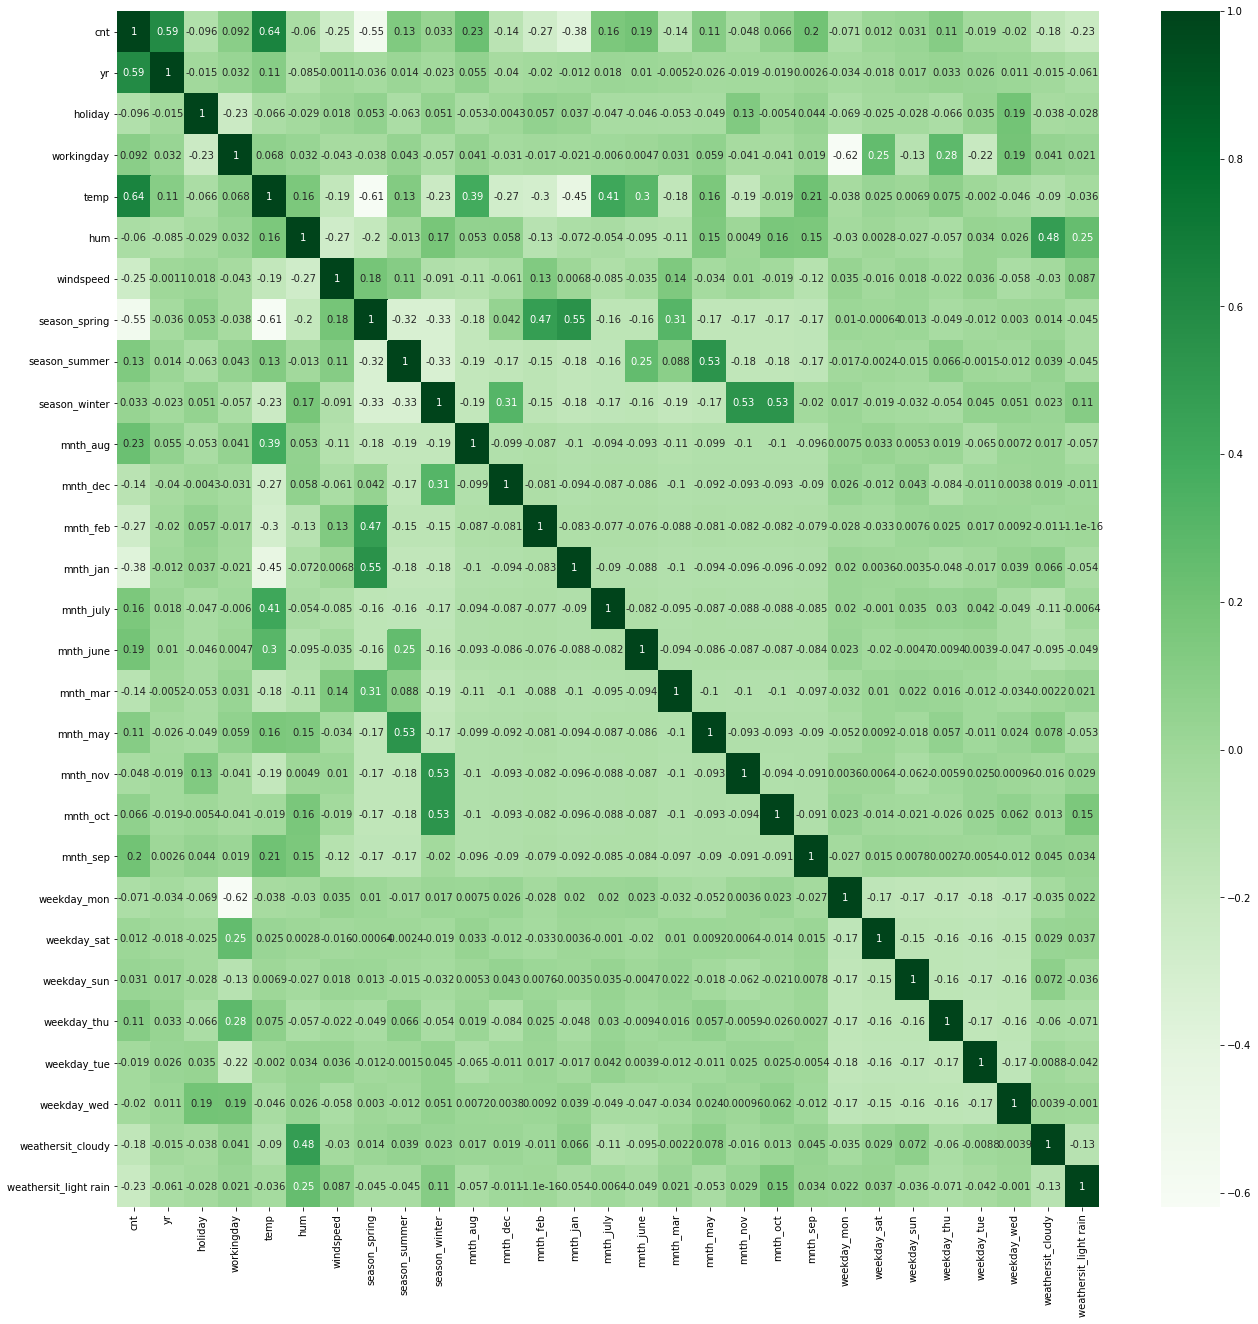

In [32]:
# As we have new columns and every categorical variable is conveted into numerical data("using dummy variables")
# lets check the correlation of all the variables with target variable("cnt")
# Here we can see that temp and year have good correlation with target variable("cnt")
plt.figure(figsize=(22,22))
sns.heatmap(boombikes_train.corr(),annot=True,cmap="Greens")
plt.show()

In [33]:
boombikes_train.corr()

,cnt,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_light rain
cnt,1.000000,0.591508,-0.095961,0.092320,0.643517,-0.059993,-0.253794,-0.548871,0.134343,0.032636,0.227229,-0.143598,-2.702870e-01,-0.378173,0.157812,0.187821,-0.137537,0.113027,-0.048130,0.065692,0.201327,-0.071188,0.012496,0.031237,0.110430,-0.018885,-0.019578,-0.175530,-2.265984e-01
yr,0.591508,1.000000,-0.014980,0.031808,0.107288,-0.084792,-0.001108,-0.036320,0.013856,-0.022638,0.054774,-0.040049,-1.991603e-02,-0.011794,0.017623,0.010484,-0.005172,-0.025933,-0.018790,-0.018790,0.002574,-0.033817,-0.017733,0.016537,0.032785,0.026024,0.010995,-0.015469,-6.076399e-02
holiday,-0.095961,-0.014980,1.000000,-0.233863,-0.066282,-0.029093,0.017569,0.053339,-0.063232,0.050712,-0.052728,-0.004302,5.652428e-02,0.037412,-0.046539,-0.045890,-0.053321,-0.049076,0.127543,-0.005387,0.043692,-0.069242,-0.025291,-0.028355,-0.066102,0.034971,0.190636,-0.038279,-2.815377e-02
workingday,0.092320,0.031808,-0.233863,1.000000,0.067787,0.031989,-0.043176,-0.037932,0.043274,-0.057297,0.040575,-0.031500,-1.680257e-02,-0.021296,-0.006030,0.004694,0.030677,0.059006,-0.041271,-0.041271,0.019495,-0.619074,0.254145,-0.126098,0.282653,-0.218510,0.187773,0.040766,2.115873e-02
temp,0.643517,0.107288,-0.066282,0.067787,1.000000,0.155415,-0.187396,-0.605988,0.125582,-0.233697,0.387456,-0.272869,-2.960214e-01,-0.446724,0.413929,0.302997,-0.179694,0.155415,-0.194765,-0.018709,0.207457,-0.037708,0.025276,0.006854,0.074973,-0.001951,-0.046291,-0.090161,-3.609266e-02
hum,-0.059993,-0.084792,-0.029093,0.031989,0.155415,1.000000,-0.266895,-0.201134,-0.013216,0.171579,0.053185,0.057832,-1.295442e-01,-0.071652,-0.053838,-0.095033,-0.110761,0.145604,0.004910,0.162014,0.152628,-0.030499,0.002783,-0.027388,-0.056997,0.033548,0.026395,0.481042,2.450381e-01
windspeed,-0.253794,-0.001108,0.017569,-0.043176,-0.187396,-0.266895,1.000000,0.180743,0.110089,-0.090649,-0.111243,-0.060975,1.331228e-01,0.006793,-0.085478,-0.035012,0.142173,-0.034137,0.009952,-0.018973,-0.121734,0.035390,-0.016284,0.018278,-0.021502,0.035616,-0.057518,-0.030385,8.689990e-02
season_spring,-0.548871,-0.036320,0.053339,-0.037932,-0.605988,-0.201134,0.180743,1.000000,-0.322955,-0.326377,-0.184784,0.041868,4.715403e-01,0.548861,-0.163094,-0.160819,0.305009,-0.171986,-0.174161,-0.174161,-0.167580,0.010007,-0.000641,0.013022,-0.048931,-0.012251,0.002987,0.013970,-4.455809e-02
season_summer,0.134343,0.013856,-0.063232,0.043274,0.125582,-0.013216,0.110089,-0.322955,1.000000,-0.328116,-0.185769,-0.172902,-1.522862e-01,-0.177257,-0.163963,0.254937,0.088068,0.532539,-0.175089,-0.175089,-0.168473,-0.017169,-0.002397,-0.015325,0.066484,-0.001490,-0.012151,0.039442,-4.523062e-02
season_winter,0.032636,-0.022638,0.050712,-0.057297,-0.233697,0.171579,-0.090649,-0.326377,-0.328116,1.000000,-0.187737,0.314816,-1.538999e-01,-0.179136,-0.165701,-0.163389,-0.189849,-0.174734,0.533619,0.533619,-0.020175,0.016635,-0.019389,-0.032037,-0.054098,0.045054,0.050608,0.023127,1.144484e-01


##### Dividing the training data into X_train and y_train for the model building

In [34]:
y_train = boombikes_train.pop("cnt")
X_train = boombikes_train

In [35]:
print(X_train.shape)
X_train.head()

(510, 28)


,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_light rain
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Building a linear model
- Here we can use two method to build a linear regression model.
    - RFE(Recursive Feature Elimination)
    - Manual method(using statsmodel)
- Best practise is to use both the methods, 1st we will use RFE to eliminate most of the insignificant variables and then will use manual approach to eliminate the variables using "p-value" and "VIF" value.

- ##### Building model with sklearn using RFE

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()
lm = lm.fit(X_train,y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train,y_train)

In [38]:
# we can top 15 variables which are significant as per RFE
lm_RFE = pd.DataFrame({"attributes" : X_train.columns,"rfe.support_":rfe.support_,"rfe.ranking_":rfe.ranking_})
lm_RFE = lm_RFE.sort_values("rfe.ranking_")
lm_RFE

,attributes,rfe.support_,rfe.ranking_
0,yr,True,1
19,mnth_sep,True,1
17,mnth_nov,True,1
26,weathersit_cloudy,True,1
12,mnth_jan,True,1
10,mnth_dec,True,1
8,season_winter,True,1
13,mnth_july,True,1
6,season_spring,True,1
1,holiday,True,1


In [39]:
top15_variables = X_train.columns[rfe.support_]
top15_variables

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_july',
       'mnth_nov', 'mnth_sep', 'weathersit_cloudy', 'weathersit_light rain'],
      dtype='object')

- ##### Building model with statsmodels(manual approach)
    1.) Here we can get complete statictics of the model and can use these statistics to evaluate the model further more

In [40]:
X_train_sm = X_train[top15_variables]
print(X_train_sm.shape)
X_train_sm.head()

(510, 15)


,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_dec,mnth_jan,mnth_july,mnth_nov,mnth_sep,weathersit_cloudy,weathersit_light rain
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0


In [41]:
y_train_sm = y_train
y_train_sm.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [42]:
# defining a function for building a model and returning the summary of that model.
def OLS(X_train_sm,y_train_sm):
    X_train_sm = sm.add_constant(X_train_sm)
    lr_sm = sm.OLS(y_train_sm,X_train_sm)
    lr_sm = lr_sm.fit()
    return lr_sm

In [43]:
# defining a function for VIF.
def VIF(X_train_sm):
    vif = [round(variance_inflation_factor(X_train_sm.values,i),2) for i in range(X_train_sm.shape[1])]
    VIF = pd.DataFrame({"attributes":X_train_sm.columns,"VIF":vif})
    VIF = VIF.sort_values("VIF",ascending=False)
    print(VIF)

#### model 1
##### From the below data we can see that 
    - R-squared and Adjusted R-squared difference is min
    - P_value for all the variables is less than 0.05
    - But after verifying VIF we see that "hum" and "temp" has VIF value greater than 5 and can be removed.

In [44]:
lr_1 = OLS(X_train_sm,y_train_sm)
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.34e-189
Time:                        22:40:08   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3202      0.036      8.886      0.000       0.249       0.391
yr                        0.2303      0.008     28.511      0.000       0.214       0.246
holiday                  -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                      0.4800      0.037     12.977      0.000       0.407       0.553
hum                      -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring            -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer             0.0408      0.015      2.659      0.008       0.011       0.071
season_winter             0.1034      0.018      5.763      0.000       0.068       0.139
mnth_dec                 -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_jan                 -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_july                -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_nov                 -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_sep                  0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_cloudy        -0.0559      0.010     -5.338      0.000      -0.076      -0.035
weathersit_light rain    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
VIF(X_train_sm)

               attributes    VIF
3                     hum  30.94
2                    temp  17.80
4               windspeed   4.72
5           season_spring   4.37
7           season_winter   4.06
6           season_summer   2.81
13      weathersit_cloudy   2.32
0                      yr   2.09
11               mnth_nov   1.83
9                mnth_jan   1.75
10              mnth_july   1.59
8                mnth_dec   1.55
12               mnth_sep   1.41
14  weathersit_light rain   1.28
1                 holiday   1.06


#### model 2
- ##### building a new model after removing "hum" and will repeate the procedure untill we have all the VIF values less than 5 and p_values less than 0.05

In [46]:
X_train_sm = X_train_sm.drop("hum",1)
print(X_train_sm.shape)
X_train_sm.head()

(510, 14)


,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_dec,mnth_jan,mnth_july,mnth_nov,mnth_sep,weathersit_cloudy,weathersit_light rain
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,1,0


In [47]:
lr_2 = OLS(X_train_sm,y_train_sm)
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.57e-186
Time:                        22:40:08   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2466      0.032      7.679      0.000       0.184       0.310
yr                        0.2343      0.008     28.709      0.000       0.218       0.250
holiday                  -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                      0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_spring            -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer             0.0333      0.015      2.148      0.032       0.003       0.064
season_winter             0.0887      0.018      4.951      0.000       0.053       0.124
mnth_dec                 -0.0445      0.018     -2.520      0.012      -0.079      -0.010
mnth_jan                 -0.0503      0.018     -2.738      0.006      -0.086      -0.014
mnth_july                -0.0504      0.018     -2.725      0.007      -0.087      -0.014
mnth_nov                 -0.0419      0.019     -2.198      0.028      -0.079      -0.004
mnth_sep                  0.0682      0.017      3.992      0.000       0.035       0.102
weathersit_cloudy        -0.0814      0.009     -9.359      0.000      -0.099      -0.064
weathersit_light rain    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
VIF(X_train_sm)

               attributes   VIF
2                    temp  5.17
3               windspeed  4.67
6           season_winter  2.94
4           season_spring  2.89
5           season_summer  2.23
0                      yr  2.07
10               mnth_nov  1.80
8                mnth_jan  1.66
9               mnth_july  1.59
12      weathersit_cloudy  1.56
7                mnth_dec  1.46
11               mnth_sep  1.35
13  weathersit_light rain  1.09
1                 holiday  1.06


#### model 3
    - Creating new model by removing "temp" which has VIF=5.17 

In [49]:
X_train_sm = X_train_sm.drop("temp",1)
print(X_train_sm.shape)
X_train_sm.head()

(510, 13)


,yr,holiday,windspeed,season_spring,season_summer,season_winter,mnth_dec,mnth_jan,mnth_july,mnth_nov,mnth_sep,weathersit_cloudy,weathersit_light rain
653,1,0,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.255342,1,0,0,0,0,0,0,0,1,0
728,1,0,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.188475,0,1,0,0,0,0,0,0,1,0


In [50]:
lr_3 = OLS(X_train_sm,y_train_sm)
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.50e-160
Time:                        22:40:08   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5961      0.016     37.557      0.000       0.565       0.627
yr                        0.2454      0.009     26.627      0.000       0.227       0.264
holiday                  -0.0856      0.030     -2.896      0.004      -0.144      -0.028
windspeed                -0.1903      0.029     -6.675      0.000      -0.246      -0.134
season_spring            -0.2503      0.018    -14.146      0.000      -0.285      -0.216
season_summer            -0.0511      0.016     -3.252      0.001      -0.082      -0.020
season_winter            -0.0213      0.018     -1.216      0.225      -0.056       0.013
mnth_dec                 -0.1100      0.019     -5.752      0.000      -0.148      -0.072
mnth_jan                 -0.1202      0.020     -6.069      0.000      -0.159      -0.081
mnth_july                -0.0186      0.021     -0.894      0.372      -0.059       0.022
mnth_nov                 -0.1013      0.021     -4.847      0.000      -0.142      -0.060
mnth_sep                  0.0530      0.019      2.735      0.006       0.015       0.091
weathersit_cloudy        -0.0882      0.010     -8.938      0.000      -0.108      -0.069
weathersit_light rain    -0.3127      0.028    -11.207      0.000      -0.367      -0.258
==============================================================================
Omnibus:                       56.767   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.173
Skew:                          -0.589   Prob(JB):                     4.44e-30
Kurtosis:                       5.230   Cond. No.                         9.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
VIF(X_train_sm)

               attributes   VIF
2               windspeed  3.88
3           season_spring  2.89
5           season_winter  2.84
4           season_summer  2.01
0                      yr  1.83
9                mnth_nov  1.79
7                mnth_jan  1.64
11      weathersit_cloudy  1.52
6                mnth_dec  1.45
8               mnth_july  1.20
10               mnth_sep  1.18
12  weathersit_light rain  1.09
1                 holiday  1.06


#### model 4
    - Creating new model by removing "mnth_july" which has p_value=0.372

In [52]:
X_train_sm = X_train_sm.drop("mnth_july",1)
print(X_train_sm.shape)
X_train_sm.head()

(510, 12)


,yr,holiday,windspeed,season_spring,season_summer,season_winter,mnth_dec,mnth_jan,mnth_nov,mnth_sep,weathersit_cloudy,weathersit_light rain
653,1,0,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,1,0,0,0,0,0,0,1,0
728,1,0,0.663106,1,0,0,1,0,0,0,0,0
482,1,0,0.188475,0,1,0,0,0,0,0,1,0


In [53]:
lr_4 = OLS(X_train_sm,y_train_sm)
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     158.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.36e-161
Time:                        22:40:08   Log-Likelihood:                 439.28
No. Observations:                 510   AIC:                            -852.6
Df Residuals:                     497   BIC:                            -797.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5892      0.014     42.571      0.000       0.562       0.616
yr                        0.2455      0.009     26.644      0.000       0.227       0.264
holiday                  -0.0853      0.030     -2.886      0.004      -0.143      -0.027
windspeed                -0.1902      0.029     -6.671      0.000      -0.246      -0.134
season_spring            -0.2437      0.016    -15.140      0.000      -0.275      -0.212
season_summer            -0.0445      0.014     -3.210      0.001      -0.072      -0.017
season_winter            -0.0155      0.016     -0.951      0.342      -0.047       0.016
mnth_dec                 -0.1094      0.019     -5.727      0.000      -0.147      -0.072
mnth_jan                 -0.1202      0.020     -6.070      0.000      -0.159      -0.081
mnth_nov                 -0.1006      0.021     -4.814      0.000      -0.142      -0.060
mnth_sep                  0.0583      0.018      3.162      0.002       0.022       0.095
weathersit_cloudy        -0.0876      0.010     -8.899      0.000      -0.107      -0.068
weathersit_light rain    -0.3128      0.028    -11.213      0.000      -0.368      -0.258
==============================================================================
Omnibus:                       56.910   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.384
Skew:                          -0.593   Prob(JB):                     6.59e-30
Kurtosis:                       5.218   Cond. No.                         8.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
VIF(X_train_sm)

               attributes   VIF
2               windspeed  3.52
5           season_winter  2.74
3           season_spring  2.71
4           season_summer  1.86
8                mnth_nov  1.79
0                      yr  1.77
7                mnth_jan  1.64
10      weathersit_cloudy  1.52
6                mnth_dec  1.45
9                mnth_sep  1.16
11  weathersit_light rain  1.09
1                 holiday  1.06


#### model 5
    - Creating new model by removing "season_winter" which has p_value=0.342

In [55]:
X_train_sm = X_train_sm.drop("season_winter",1)
print(X_train_sm.shape)
X_train_sm.head()

(510, 11)


,yr,holiday,windspeed,season_spring,season_summer,mnth_dec,mnth_jan,mnth_nov,mnth_sep,weathersit_cloudy,weathersit_light rain
653,1,0,0.300794,0,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.255342,1,0,0,0,0,0,1,0
728,1,0,0.663106,1,0,1,0,0,0,0,0
482,1,0,0.188475,0,1,0,0,0,0,1,0


In [56]:
lr_5 = OLS(X_train_sm,y_train)
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          7.42e-162
Time:                        22:40:09   Log-Likelihood:                 438.82
No. Observations:                 510   AIC:                            -853.6
Df Residuals:                     498   BIC:                            -802.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5845      0.013     45.172      0.000       0.559       0.610
yr                        0.2456      0.009     26.656      0.000       0.228       0.264
holiday                  -0.0855      0.030     -2.892      0.004      -0.144      -0.027
windspeed                -0.1910      0.028     -6.706      0.000      -0.247      -0.135
season_spring            -0.2372      0.015    -16.294      0.000      -0.266      -0.209
season_summer            -0.0392      0.013     -3.087      0.002      -0.064      -0.014
mnth_dec                 -0.1169      0.017     -6.725      0.000      -0.151      -0.083
mnth_jan                 -0.1215      0.020     -6.150      0.000      -0.160      -0.083
mnth_nov                 -0.1107      0.018     -6.167      0.000      -0.146      -0.075
mnth_sep                  0.0602      0.018      3.287      0.001       0.024       0.096
weathersit_cloudy        -0.0884      0.010     -9.008      0.000      -0.108      -0.069
weathersit_light rain    -0.3160      0.028    -11.416      0.000      -0.370      -0.262
==============================================================================
Omnibus:                       60.373   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.031
Skew:                          -0.617   Prob(JB):                     1.18e-32
Kurtosis:                       5.323   Cond. No.                         8.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
VIF(X_train_sm)

               attributes   VIF
2               windspeed  3.22
3           season_spring  2.36
0                      yr  1.74
4           season_summer  1.69
6                mnth_jan  1.62
9       weathersit_cloudy  1.47
7                mnth_nov  1.23
8                mnth_sep  1.16
5                mnth_dec  1.13
1                 holiday  1.06
10  weathersit_light rain  1.06


#### model 6
    - In the above model(model 5) we can see that all the p_values are less than 0.05 and VIF values are less than 5 and can consider the above model as one of the best model.
    - But as in EDA we have observed a temp has a good correlation with demand("cnt").
    - Lets add "temp" back and observe the effect

In [58]:
X_train_sm["temp"] = X_train["temp"]
print(X_train_sm.shape)
X_train_sm.head()

(510, 12)


,yr,holiday,windspeed,season_spring,season_summer,mnth_dec,mnth_jan,mnth_nov,mnth_sep,weathersit_cloudy,weathersit_light rain,temp
653,1,0,0.300794,0,0,0,0,0,0,0,0,0.509887
576,1,0,0.264686,0,0,0,0,0,0,0,0,0.815169
426,1,0,0.255342,1,0,0,0,0,0,1,0,0.442393
728,1,0,0.663106,1,0,1,0,0,0,0,0,0.245101
482,1,0,0.188475,0,1,0,0,0,0,1,0,0.395666


In [59]:
lr_6 = OLS(X_train_sm,y_train_sm)
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     197.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.64e-180
Time:                        22:40:09   Log-Likelihood:                 485.30
No. Observations:                 510   AIC:                            -944.6
Df Residuals:                     497   BIC:                            -889.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3572      0.026     13.906      0.000       0.307       0.408
yr                        0.2375      0.008     28.074      0.000       0.221       0.254
holiday                  -0.0886      0.027     -3.278      0.001      -0.142      -0.035
windspeed                -0.1640      0.026     -6.268      0.000      -0.215      -0.113
season_spring            -0.1399      0.016     -8.480      0.000      -0.172      -0.107
season_summer            -0.0009      0.012     -0.074      0.941      -0.025       0.023
mnth_dec                 -0.0297      0.018     -1.638      0.102      -0.065       0.006
mnth_jan                 -0.0656      0.019     -3.472      0.001      -0.103      -0.028
mnth_nov                 -0.0131      0.019     -0.688      0.492      -0.051       0.024
mnth_sep                  0.0668      0.017      3.985      0.000       0.034       0.100
weathersit_cloudy        -0.0787      0.009     -8.732      0.000      -0.096      -0.061
weathersit_light rain    -0.2848      0.025    -11.172      0.000      -0.335      -0.235
temp                      0.3059      0.031      9.968      0.000       0.246       0.366
==============================================================================
Omnibus:                       55.471   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.108
Skew:                          -0.599   Prob(JB):                     1.85e-27
Kurtosis:                       5.088   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
VIF(X_train_sm)

               attributes   VIF
2               windspeed  4.44
11                   temp  3.86
3           season_spring  2.44
0                      yr  2.05
4           season_summer  1.72
6                mnth_jan  1.63
9       weathersit_cloudy  1.52
8                mnth_sep  1.24
7                mnth_nov  1.23
5                mnth_dec  1.13
10  weathersit_light rain  1.07
1                 holiday  1.06


#### model 7
    - Creating new model by removing "season_summer" which has p_value=0.941

In [61]:
X_train_sm = X_train_sm.drop("season_summer",1)
print(X_train_sm.shape)
X_train_sm.head()

(510, 11)


,yr,holiday,windspeed,season_spring,mnth_dec,mnth_jan,mnth_nov,mnth_sep,weathersit_cloudy,weathersit_light rain,temp
653,1,0,0.300794,0,0,0,0,0,0,0,0.509887
576,1,0,0.264686,0,0,0,0,0,0,0,0.815169
426,1,0,0.255342,1,0,0,0,0,1,0,0.442393
728,1,0,0.663106,1,1,0,0,0,0,0,0.245101
482,1,0,0.188475,0,0,0,0,0,1,0,0.395666


In [62]:
lr_7 = OLS(X_train_sm,y_train_sm)
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.76e-181
Time:                        22:40:09   Log-Likelihood:                 485.29
No. Observations:                 510   AIC:                            -946.6
Df Residuals:                     498   BIC:                            -895.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3564      0.023     15.285      0.000       0.311       0.402
yr                        0.2375      0.008     28.103      0.000       0.221       0.254
holiday                  -0.0886      0.027     -3.283      0.001      -0.142      -0.036
windspeed                -0.1643      0.026     -6.338      0.000      -0.215      -0.113
season_spring            -0.1393      0.015     -9.607      0.000      -0.168      -0.111
mnth_dec                 -0.0292      0.017     -1.717      0.087      -0.063       0.004
mnth_jan                 -0.0655      0.019     -3.489      0.001      -0.102      -0.029
mnth_nov                 -0.0125      0.017     -0.725      0.469      -0.047       0.021
mnth_sep                  0.0671      0.016      4.195      0.000       0.036       0.099
weathersit_cloudy        -0.0788      0.009     -8.746      0.000      -0.096      -0.061
weathersit_light rain    -0.2846      0.025    -11.233      0.000      -0.334      -0.235
temp                      0.3067      0.029     10.535      0.000       0.249       0.364
==============================================================================
Omnibus:                       55.271   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.409
Skew:                          -0.597   Prob(JB):                     2.63e-27
Kurtosis:                       5.082   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
VIF(X_train_sm)

               attributes   VIF
2               windspeed  3.93
10                   temp  3.79
3           season_spring  2.20
0                      yr  2.05
5                mnth_jan  1.63
8       weathersit_cloudy  1.49
7                mnth_sep  1.17
6                mnth_nov  1.16
4                mnth_dec  1.10
1                 holiday  1.06
9   weathersit_light rain  1.06


#### model 8
    - Creating new model by removing "mnth_nov" which has p_value=0.469

In [64]:
X_train_sm = X_train_sm.drop("mnth_nov",1)
print(X_train_sm.shape)
X_train_sm.head()

(510, 10)


,yr,holiday,windspeed,season_spring,mnth_dec,mnth_jan,mnth_sep,weathersit_cloudy,weathersit_light rain,temp
653,1,0,0.300794,0,0,0,0,0,0,0.509887
576,1,0,0.264686,0,0,0,0,0,0,0.815169
426,1,0,0.255342,1,0,0,0,1,0,0.442393
728,1,0,0.663106,1,1,0,0,0,0,0.245101
482,1,0,0.188475,0,0,0,0,1,0,0.395666


In [65]:
lr_8 = OLS(X_train_sm,y_train_sm)
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.44e-182
Time:                        22:40:09   Log-Likelihood:                 485.02
No. Observations:                 510   AIC:                            -948.0
Df Residuals:                     499   BIC:                            -901.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3486      0.021     16.877      0.000       0.308       0.389
yr                        0.2374      0.008     28.107      0.000       0.221       0.254
holiday                  -0.0913      0.027     -3.415      0.001      -0.144      -0.039
windspeed                -0.1633      0.026     -6.312      0.000      -0.214      -0.112
season_spring            -0.1356      0.014    -10.012      0.000      -0.162      -0.109
mnth_dec                 -0.0260      0.016     -1.582      0.114      -0.058       0.006
mnth_jan                 -0.0637      0.019     -3.425      0.001      -0.100      -0.027
mnth_sep                  0.0683      0.016      4.290      0.000       0.037       0.100
weathersit_cloudy        -0.0784      0.009     -8.725      0.000      -0.096      -0.061
weathersit_light rain    -0.2842      0.025    -11.226      0.000      -0.334      -0.234
temp                      0.3160      0.026     12.102      0.000       0.265       0.367
==============================================================================
Omnibus:                       54.614   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.089
Skew:                          -0.590   Prob(JB):                     5.08e-27
Kurtosis:                       5.075   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
VIF(X_train_sm)

              attributes   VIF
2              windspeed  3.76
9                   temp  3.76
3          season_spring  2.14
0                     yr  2.03
5               mnth_jan  1.63
7      weathersit_cloudy  1.49
6               mnth_sep  1.16
4               mnth_dec  1.09
8  weathersit_light rain  1.06
1                holiday  1.03


#### model 9
    - Creating new model by removing "mnth_dec" which has p_value=0.114

In [67]:
X_train_sm = X_train_sm.drop("mnth_dec",1)
print(X_train_sm.shape)
X_train_sm.head()

(510, 9)


,yr,holiday,windspeed,season_spring,mnth_jan,mnth_sep,weathersit_cloudy,weathersit_light rain,temp
653,1,0,0.300794,0,0,0,0,0,0.509887
576,1,0,0.264686,0,0,0,0,0,0.815169
426,1,0,0.255342,1,0,0,1,0,0.442393
728,1,0,0.663106,1,0,0,0,0,0.245101
482,1,0,0.188475,0,0,0,1,0,0.395666


In [68]:
lr_9 = OLS(X_train_sm,y_train_sm)
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.00e-183
Time:                        22:40:09   Log-Likelihood:                 483.75
No. Observations:                 510   AIC:                            -947.5
Df Residuals:                     500   BIC:                            -905.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3357      0.019     17.659      0.000       0.298       0.373
yr                        0.2374      0.008     28.065      0.000       0.221       0.254
holiday                  -0.0905      0.027     -3.381      0.001      -0.143      -0.038
windspeed                -0.1577      0.026     -6.143      0.000      -0.208      -0.107
season_spring            -0.1343      0.014     -9.922      0.000      -0.161      -0.108
mnth_jan                 -0.0571      0.018     -3.145      0.002      -0.093      -0.021
mnth_sep                  0.0695      0.016      4.365      0.000       0.038       0.101
weathersit_cloudy        -0.0783      0.009     -8.694      0.000      -0.096      -0.061
weathersit_light rain    -0.2828      0.025    -11.160      0.000      -0.333      -0.233
temp                      0.3304      0.024     13.491      0.000       0.282       0.379
==============================================================================
Omnibus:                       52.953   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.989
Skew:                          -0.575   Prob(JB):                     3.95e-26
Kurtosis:                       5.046   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
VIF(X_train_sm)

              attributes   VIF
8                   temp  3.76
2              windspeed  3.73
3          season_spring  2.11
0                     yr  2.03
4               mnth_jan  1.60
6      weathersit_cloudy  1.47
5               mnth_sep  1.16
7  weathersit_light rain  1.06
1                holiday  1.03


##### Residual Analysis (model 9)
    - lets check if the error terms are normally distributed (which is infact, one of the major assumptions of linear 'regression), let us plot the histogram of the error terms and see what it looks like.
    - Also lets check for independence and equal variance.

- After Residual Analysis we can see that we have an ideal model with all the error terms "Normally Distributed" and with equal variance and independence when plotted againts y_ predicted values.

In [70]:
print(X_train_sm.shape)
X_train_sm.head()

(510, 9)


,yr,holiday,windspeed,season_spring,mnth_jan,mnth_sep,weathersit_cloudy,weathersit_light rain,temp
653,1,0,0.300794,0,0,0,0,0,0.509887
576,1,0,0.264686,0,0,0,0,0,0.815169
426,1,0,0.255342,1,0,0,1,0,0.442393
728,1,0,0.663106,1,0,0,0,0,0.245101
482,1,0,0.188475,0,0,0,1,0,0.395666


In [71]:
X_train_sm = sm.add_constant(X_train_sm)
y_train_pred = lr_9.predict(X_train_sm)

In [72]:
err = y_train_sm-y_train_pred

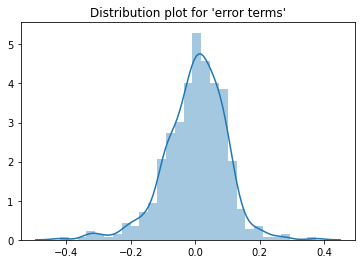

In [73]:
# plotting the error terms
plt.title("Distribution plot for 'error terms'")
sns.distplot(err)
plt.show()

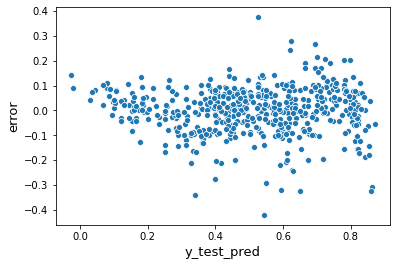

In [74]:
# plotting the error terms againts y_train_pred to check the independence and equal variance of error terms
sns.scatterplot(y_train_pred,err)
plt.xlabel("y_test_pred",size = 13)
plt.ylabel("error",size = 13)
plt.show()

#### Best Model
$ cnt = 
+ 0.3357 \times const 
+ 0.2374 \times yr
- 0.0905 \times holiday
- 0.1577 \times windspeed
- 0.1343 \times season\underline{ }spring
- 0.0571 \times mnth\underline{ }jan
+ 0.0571 \times mnth\underline{ }sep 
- 0.0783 \times weathersit\underline{ }cloudy 
- 0.2828 \times weathersit\underline{ }lightrain 
+ 0.3304 \times temp $

###  Making Predictions
- Now we have the model and also analysed the residuals lets use this model(model 9) to make predictions

In [75]:
# load the test data on which we can make our predictions
print(boombikes_test.shape)
boombikes_test.head()

(219, 29)


,cnt,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_light rain
184,6043,0,1,0,29.793347,63.7917,5.459106,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
535,6211,1,0,1,32.082500,59.2083,7.625404,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,2659,0,0,1,19.270000,81.2917,13.250121,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
221,4780,0,0,1,31.433347,42.4167,13.417286,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,4968,0,0,1,29.315000,30.5000,19.583229,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [76]:
# scaling the test dataset
scaling_attributes = ["cnt","temp","hum","windspeed"]
boombikes_test[scaling_attributes] = scaler.transform(boombikes_test[scaling_attributes])
boombikes_test.head()

,cnt,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_light rain
184,0.692706,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
535,0.712034,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0.303382,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
221,0.547400,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0.569029,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [77]:
boombikes_test.describe()

,cnt,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_light rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.520592,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.218435,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.048205,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.377531,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.524275,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.672745,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.963300,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
# splitting the test data to X_test,y_test
y_test = boombikes_test.pop("cnt")
X_test = boombikes_test[X_train_sm.drop("const",1).columns]

In [79]:
print(X_test.shape)
X_test.head()

(219, 9)


,yr,holiday,windspeed,season_spring,mnth_jan,mnth_sep,weathersit_cloudy,weathersit_light rain,temp
184,0,1,0.084219,0,0,0,1,0,0.831783
535,1,0,0.153728,0,0,0,0,0,0.901354
299,0,0,0.334206,0,0,0,1,0,0.511964
221,0,0,0.339570,0,0,0,0,0,0.881625
152,0,0,0.537414,0,0,0,0,0,0.817246


In [80]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: cnt, Length: 219, dtype: float64

In [81]:
# now the data is scaled, we can use the data to make predictions
X_test = sm.add_constant(X_test)
y_test_pred = lr_9.predict(X_test)

###### Checking the R-squared on the test set.
- Here we can see that the model r_squared is 0.826 and r_squared for test dataset is 0.8 by which we can say that the model fit isn't by chance, and has decent predictive power.
- By this we can also say that model is not overfitted.

In [82]:
from sklearn.metrics import r2_score

In [83]:
r_squared = r2_score(y_test,y_test_pred)
round(r_squared,2)

0.8

### Model Evaluation
- Let's now plot the graph for actual versus predicted values.
- Overall we can say that we have a decent model.

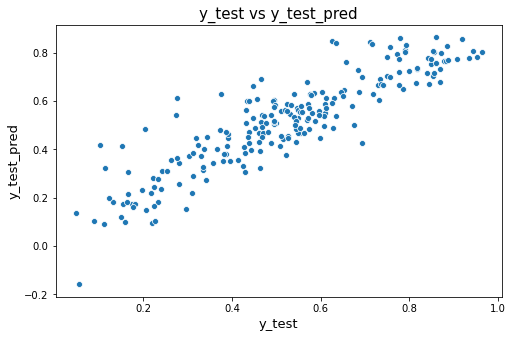

In [84]:
plt.figure(figsize=(8,5))
plt.title("y_test vs y_test_pred",size = 15)
sns.scatterplot(y_test,y_test_pred)
plt.xlabel("y_test",size = 13)
plt.ylabel("y_test_pred",size = 13)
plt.show()